# Creating final data for crop and fertilizer recommendation system

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
fertilizer_data_path = '../Data-raw/FertilizerData.csv'
merge_fert = pd.read_csv(fertilizer_data_path)

In [59]:
merge_fert.head()

,Unnamed: 0,Crop,N,P,K,pH
0,0,rice,80,40,40,5.50
1,97,rice,80,40,40,5.52
2,194,rice,80,40,40,5.54
3,291,rice,80,40,40,5.56
4,388,rice,80,40,40,5.58


In [60]:
del merge_fert['Unnamed: 0']

In [61]:
merge_fert.describe()

,N,P,K,pH
count,418.000000,418.000000,418.000000,418.000000
mean,50.454545,45.681818,48.181818,5.409091
std,35.523277,31.922068,50.570325,0.587768
min,20.000000,10.000000,10.000000,3.820000
25%,20.000000,20.000000,20.000000,5.320000
50%,30.000000,40.000000,30.000000,5.480000
75%,80.000000,60.000000,50.000000,5.620000
max,120.000000,125.000000,200.000000,6.680000


In [62]:
merge_fert['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

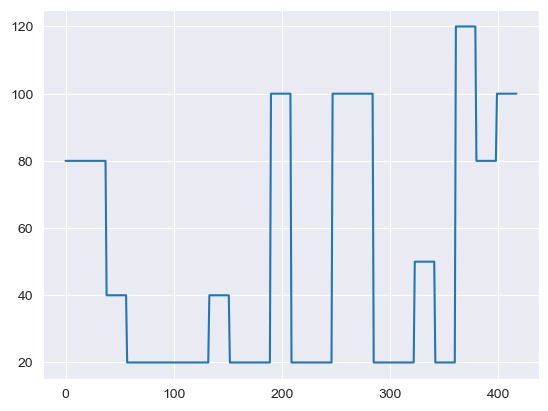

In [63]:
plt.plot(merge_fert["N"])

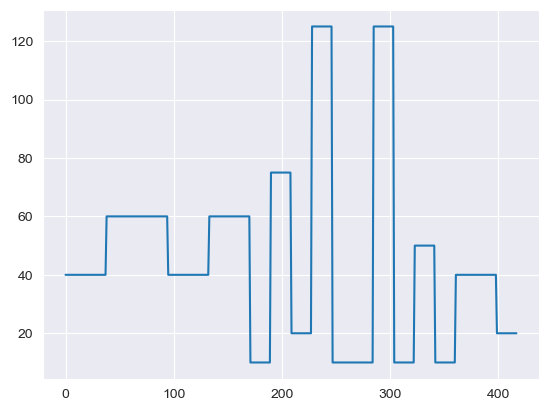

In [64]:
plt.plot(merge_fert["P"])

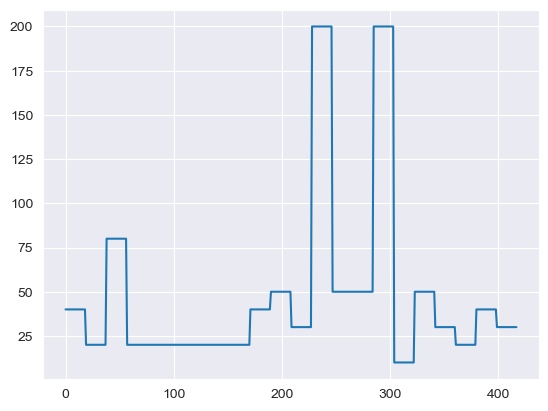

In [65]:
plt.plot(merge_fert["K"])

C:\Users\harsh\AppData\Local\Temp\ipykernel_14444\2553266000.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merge_fert.corr(),annot=True)


<Axes: >

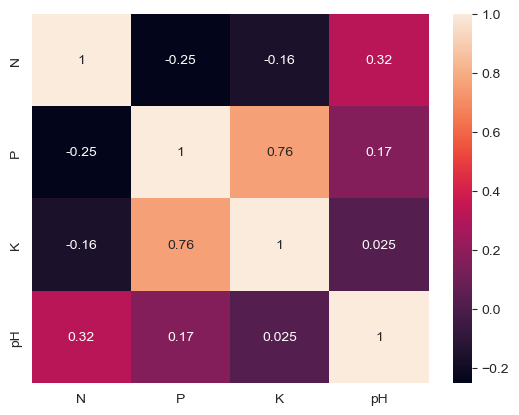

In [66]:
sns.heatmap(merge_fert.corr(),annot=True)

In [67]:
merge_crop = pd.read_csv('../Data-raw/MergeFileCrop.csv')
reco_fert = merge_fert

In [68]:
#Add +/-3 for every NPK value
import random
temp = pd.DataFrame(columns = ['N','P','K'])
for i in range(0,merge_crop.shape[0]):
    crop = merge_crop.label.iloc[i]
    #print(crop)
    N = reco_fert[reco_fert['Crop'] == crop]["N"].iloc[0] + random.randint(-20,20)
    P = reco_fert[reco_fert['Crop'] == crop]["P"].iloc[0] + random.randint(-5,20)
    K = reco_fert[reco_fert['Crop'] == crop]["K"].iloc[0] + random.randint(-5,5)
    d = {"N":N,"P":P,"K":K}
    #print(d)
    temp = temp.append(d,ignore_index = True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_14444\275644208.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14444\275644208.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14444\275644208.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_14444\275644208.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(d,ignore_index = True)
C:\Users\harsh\AppData\L

In [69]:
temp

,N,P,K
0,73,55,42
1,100,43,44
2,91,46,41
3,67,40,43
4,60,60,42
...,...,...,...
2295,88,33,32
2296,98,23,35
2297,84,27,28
2298,113,33,35


In [70]:
merge_crop['N'] = temp['N']
merge_crop['P'] = temp['P']
merge_crop['K'] = temp['K']

In [71]:
merge_crop

,Unnamed: 0,temperature,humidity,ph,rainfall,label,N,P,K
0,0,20.879744,82.002744,6.502985,202.935536,rice,73,55,42
1,1,21.770462,80.319644,7.038096,226.655537,rice,100,43,44
2,2,23.004459,82.320763,7.840207,263.964248,rice,91,46,41
3,3,26.491096,80.158363,6.980401,242.864034,rice,67,40,43
4,4,20.130175,81.604873,7.628473,262.717340,rice,60,60,42
...,...,...,...,...,...,...,...,...,...
2295,895,26.774637,66.413269,6.780064,177.774507,coffee,88,33,32
2296,896,27.417112,56.636362,6.086922,127.924610,coffee,98,23,35
2297,897,24.131797,67.225123,6.362608,173.322839,coffee,84,27,28
2298,898,26.272418,52.127394,6.758793,127.175293,coffee,113,33,35


In [72]:
del merge_crop['Unnamed: 0']

In [73]:
merge_crop

,temperature,humidity,ph,rainfall,label,N,P,K
0,20.879744,82.002744,6.502985,202.935536,rice,73,55,42
1,21.770462,80.319644,7.038096,226.655537,rice,100,43,44
2,23.004459,82.320763,7.840207,263.964248,rice,91,46,41
3,26.491096,80.158363,6.980401,242.864034,rice,67,40,43
4,20.130175,81.604873,7.628473,262.717340,rice,60,60,42
...,...,...,...,...,...,...,...,...
2295,26.774637,66.413269,6.780064,177.774507,coffee,88,33,32
2296,27.417112,56.636362,6.086922,127.924610,coffee,98,23,35
2297,24.131797,67.225123,6.362608,173.322839,coffee,84,27,28
2298,26.272418,52.127394,6.758793,127.175293,coffee,113,33,35


In [74]:
merge_crop = merge_crop[[ 'N', 'P', 'K','temperature', 'humidity', 'ph', 'rainfall', 'label']]

In [75]:
merge_crop.to_csv("../Data-processed/crop_recommendation.csv",index=False)

In [76]:
# Checking if everything went fine
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [77]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,73,55,42,20.879744,82.002744,6.502985,202.935536,rice
1,100,43,44,21.770462,80.319644,7.038096,226.655537,rice
2,91,46,41,23.004459,82.320763,7.840207,263.964248,rice
3,67,40,43,26.491096,80.158363,6.980401,242.864034,rice
4,60,60,42,20.130175,81.604873,7.628473,262.717340,rice


In [78]:
df.shape

(2300, 8)